<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/02.%20Week%202/Notebook/RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


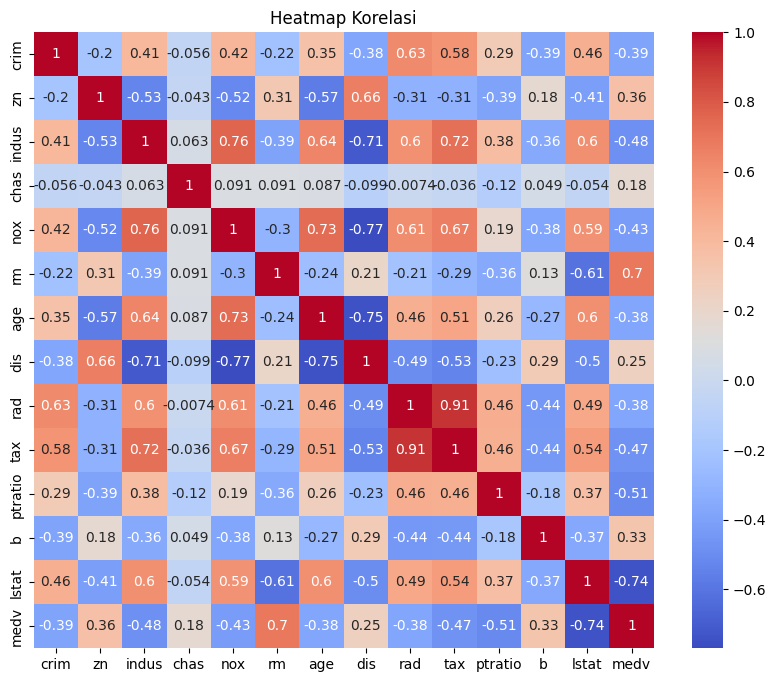

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()

# Bikin heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Picture/Linear_Correlation.png" width="600" height="600">


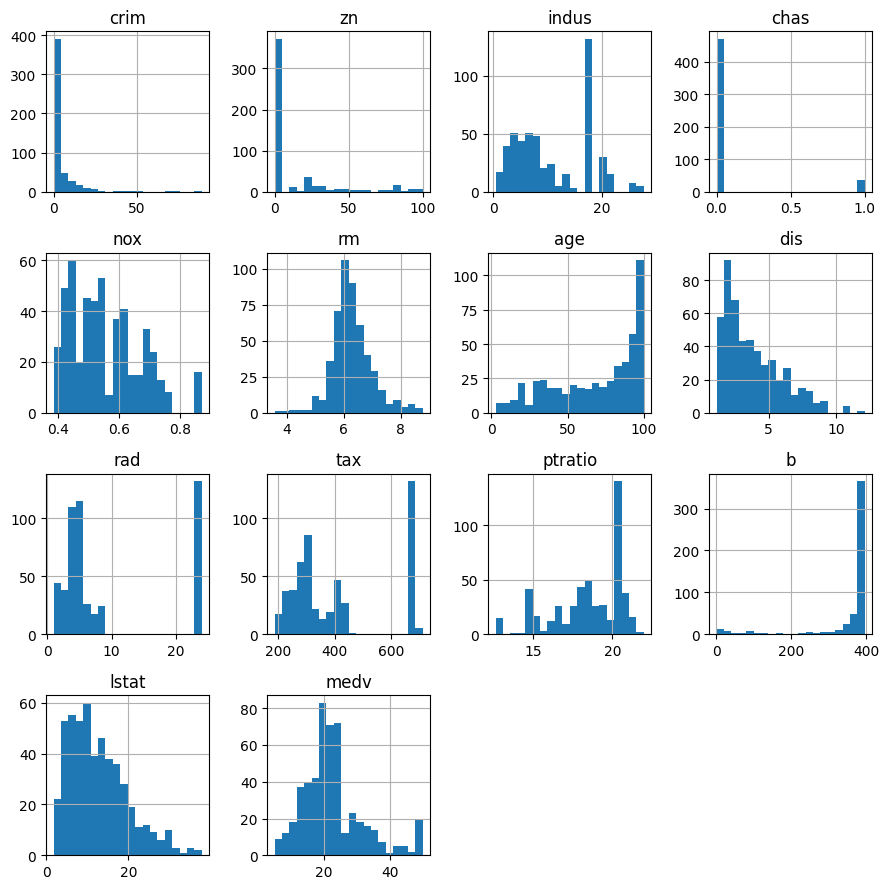

In [6]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


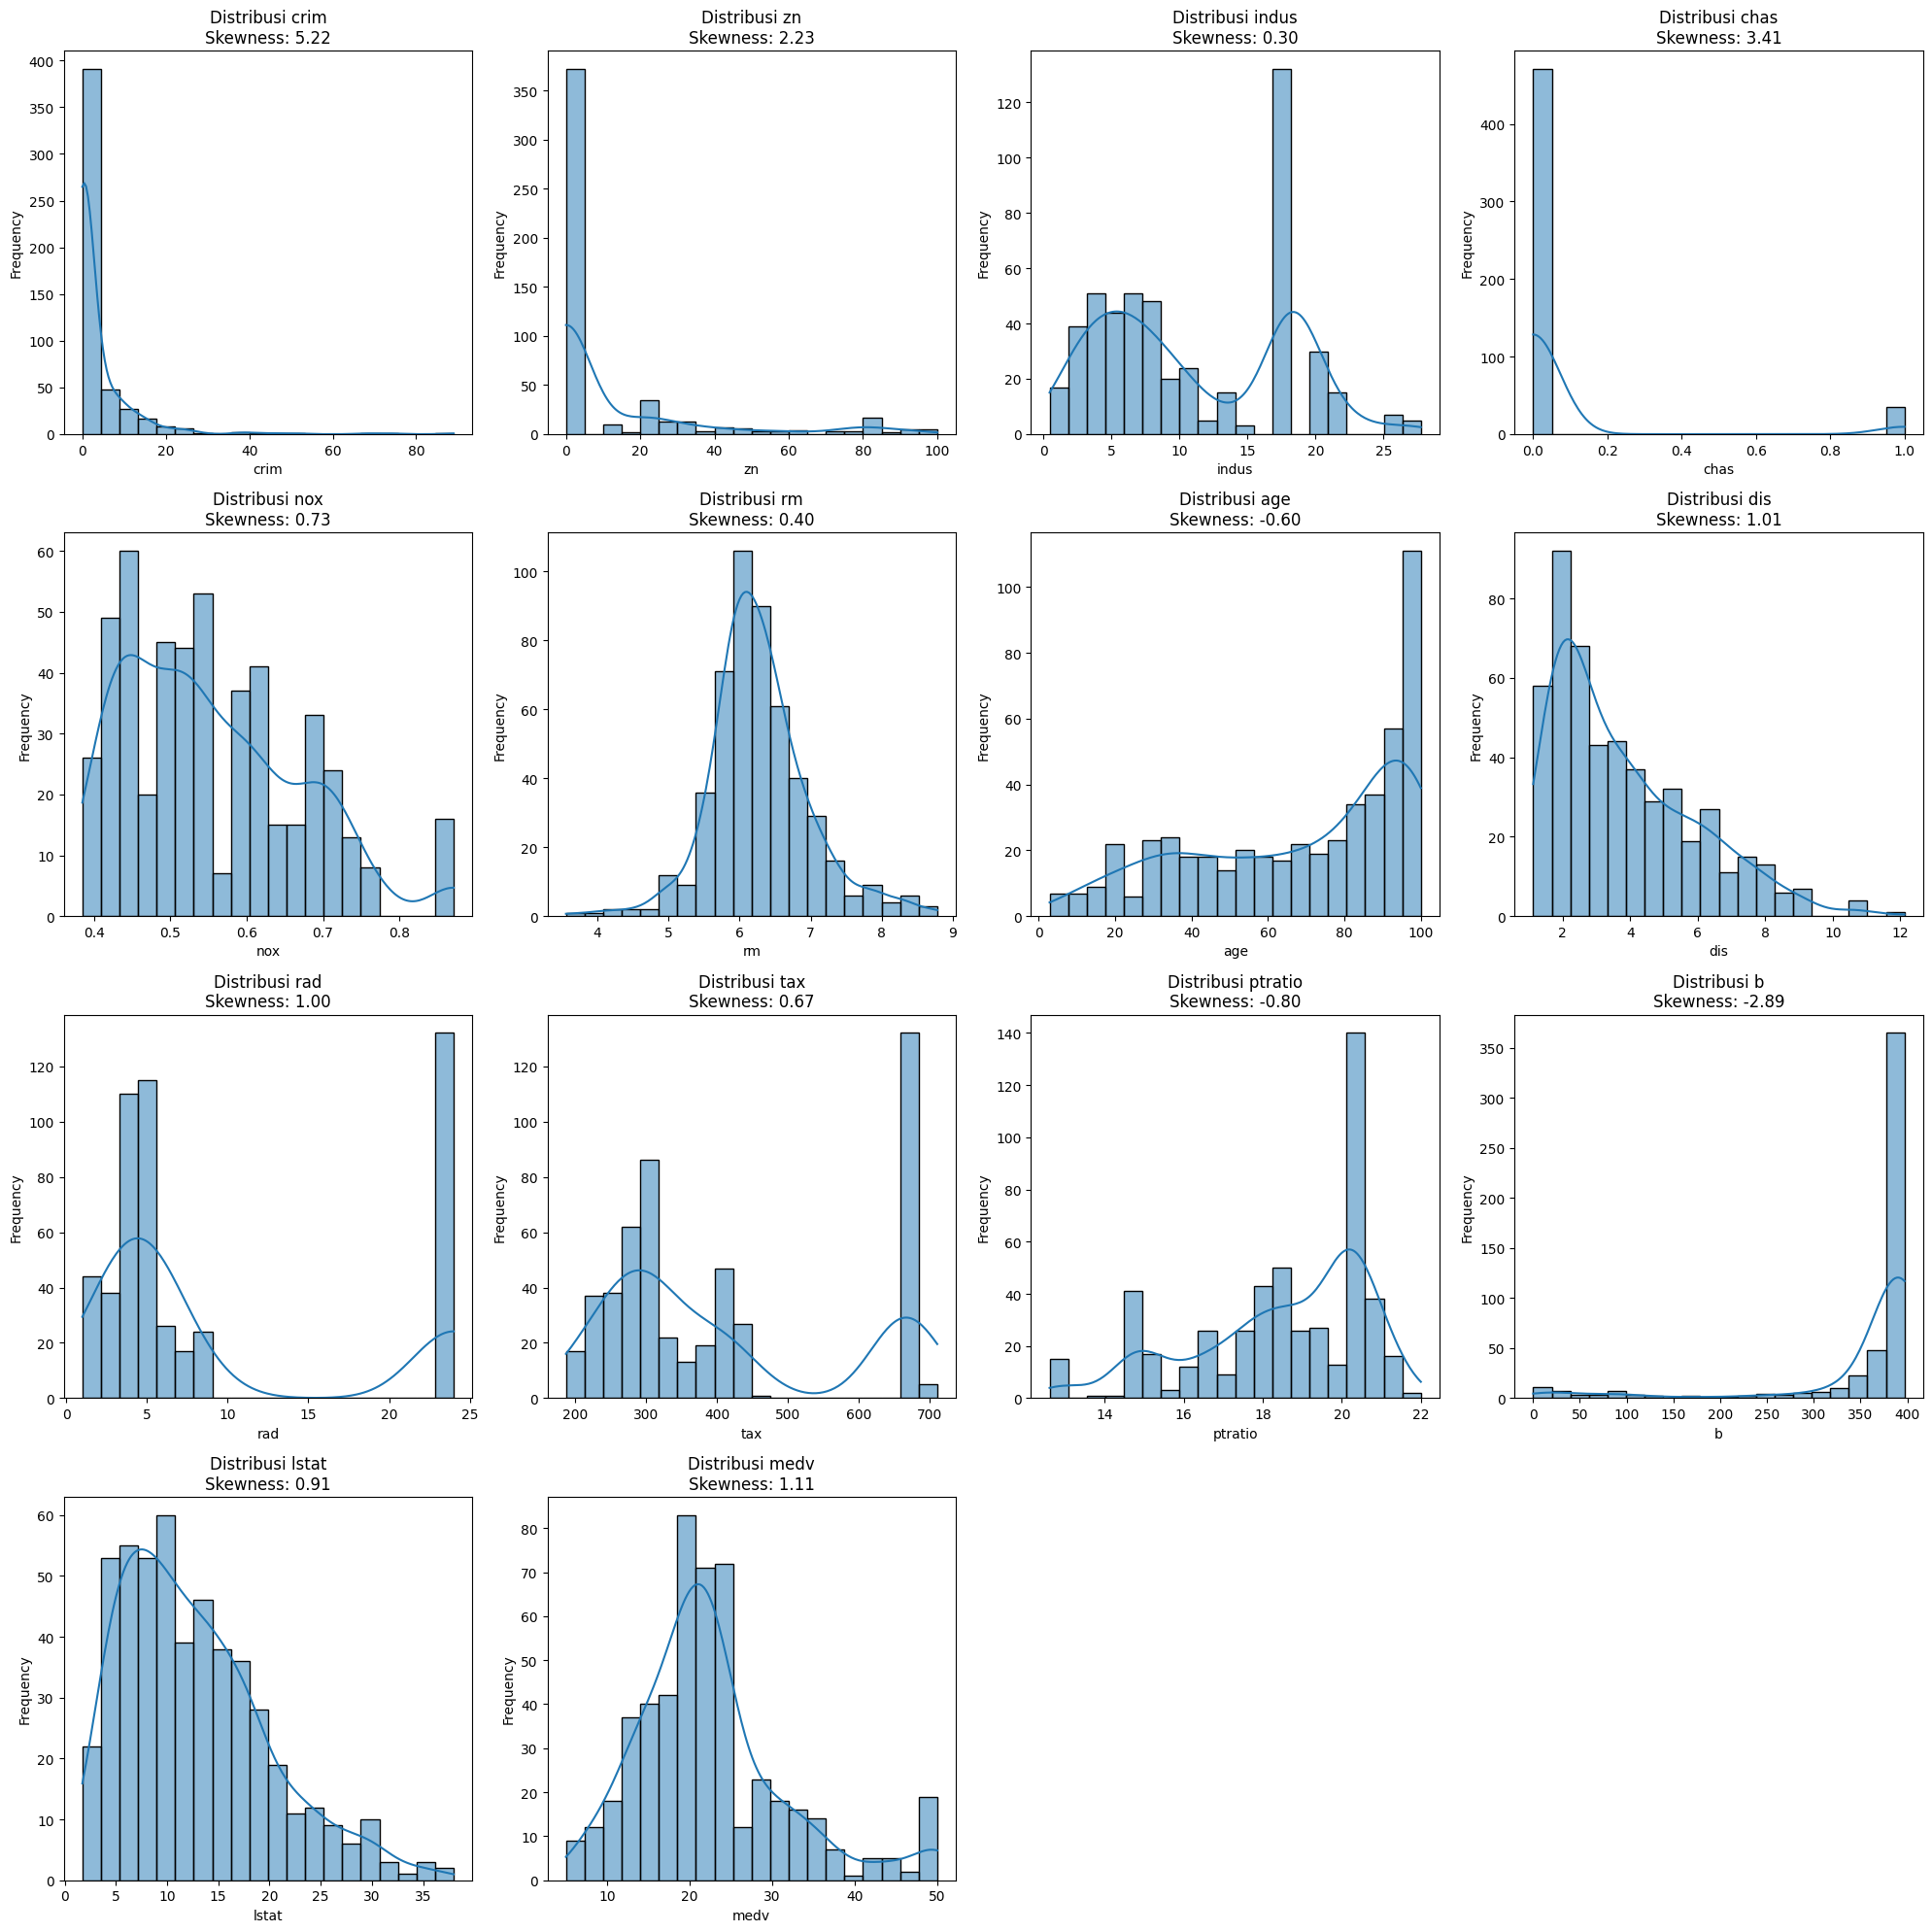

In [7]:
print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


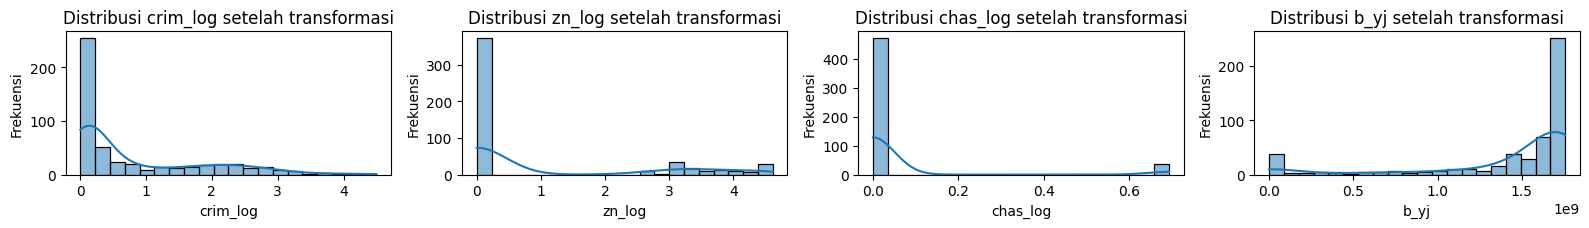

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()
transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_yj']

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581167906794


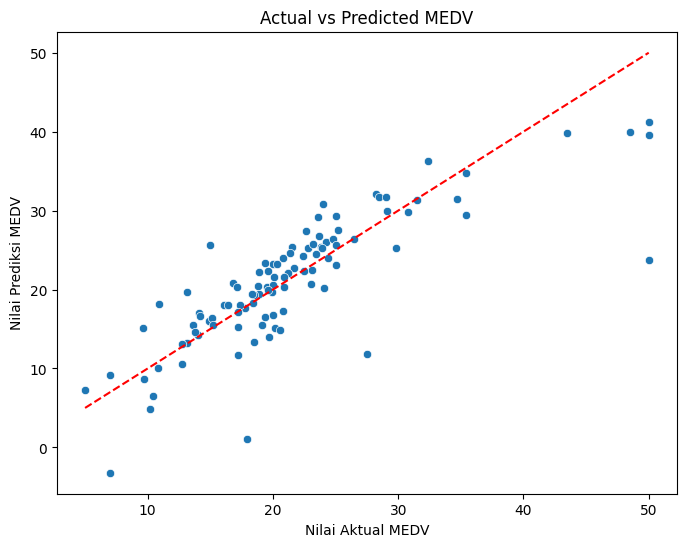

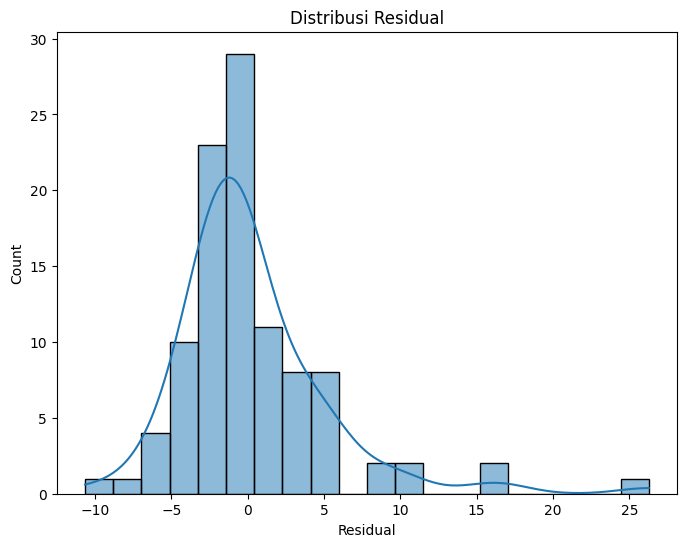

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.

# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---

## 1. Transformasi Data

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
# Transformasi Log
df_log = df.copy()
df_log[df_log.columns] = np.log1p(df_log[df_log.columns])

# Transformasi Box-Cox (hanya untuk data positif)
df_boxcox = df.copy()
df_boxcox[df_boxcox.columns] = df_boxcox[df_boxcox.columns] + 1e-6  # Menambahkan konstanta kecil untuk menghindari nol
pt_boxcox = PowerTransformer(method='box-cox')
df_boxcox[df_boxcox.columns] = pt_boxcox.fit_transform(df_boxcox[df_boxcox.columns])

# Transformasi Quantile (Normal)
df_quantile = df.copy()
qt = QuantileTransformer(output_distribution='normal')
df_quantile[df_quantile.columns] = qt.fit_transform(df_quantile[df_quantile.columns])


c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


In [50]:
# Fungsi untuk melatih dan mengevaluasi model
def train_evaluate(df_transformed, method_name):
    X = df_transformed.drop(columns=['medv'])  # Target: 'medv'
    y = df_transformed['medv']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{method_name}\nMean Squared Error: {mse:.4f} \nRMSE: {rmse:.4f} \nR Squared: {r_squared:.4f}\n")
    return mse, r_squared


In [51]:
# Evaluasi masing-masing transformasi
mse_log, r2_log = train_evaluate(df_log, "Log Transform")
mse_boxcox, r2_boxcox = train_evaluate(df_boxcox, "Box-Cox Transform")
mse_quantile, r2_quantile = train_evaluate(df_quantile, "Quantile Transform")


Log Transform
Mean Squared Error: 0.0287 
RMSE: 0.1693 
R Squared: 0.7934

Box-Cox Transform
Mean Squared Error: 0.2025 
RMSE: 0.4499 
R Squared: 0.7784

Quantile Transform
Mean Squared Error: 0.6572 
RMSE: 0.8107 
R Squared: 0.6306



In [52]:
# Menampilkan hasil perbandingan
results = pd.DataFrame({
    "Transformasi": ["Log", "Box-Cox", "Quantile"],
    "MSE": [mse_log, mse_boxcox, mse_quantile],
    "R Squared": [r2_log, r2_boxcox, r2_quantile]
})
print(results.sort_values(by='MSE'))

  Transformasi       MSE  R Squared
0          Log  0.028651   0.793431
1      Box-Cox  0.202451   0.778439
2     Quantile  0.657226   0.630604


Dari ketiga evaluasi dari 3 metode transformasi data di atas, metode terbaik jatuh pada Log Transform. Transformasi log memberikan hasil terbaik, dengan MSE paling kecil dan nilai R² tertinggi. Ini menunjukkan bahwa model yang menggunakan log transform lebih baik dalam menjelaskan variabilitas target dibandingkan transformasi lainnya. Log Transform digunakan untuk : 
- Mengurangi skewness (kecenderungan distribusi miring).
- Membantu data yang memiliki skala eksponensial agar lebih linear.
- Berguna ketika ada outlier besar karena memperkecil jaraknya.

Log transform cocok digunakan ketika data memiliki skewness ringan hingga sedang dan mengandung nilai nol.

Box-Cox transform masih cukup baik, tetapi lebih inferior dibandingkan log transform. Nilai R² lebih rendah sedikit dibandingkan log, menunjukkan bahwa model kehilangan sedikit akurasi dalam menjelaskan data. Box-Cox adalah transformasi daya (power transformation) yang mencari nilai optimal λ (lambda) untuk membuat data lebih mendekati distribusi normal. Box-Cox digunakan untuk : 
- Digunakan untuk membuat data lebih mendekati distribusi normal.
- Dapat menangani data dengan skewness yang ekstrem.
- Hanya bisa digunakan untuk data positif, sehingga sering perlu ditambahkan konstanta kecil.

Box-Cox Transform cocok digunakan ketika data hanya mengandung nilai positif dan memiliki skewness ekstrem.

Quantile transform menghasilkan performa terburuk, dengan MSE yang paling besar dan R² yang paling rendah. Ini menunjukkan bahwa model mengalami kesulitan dalam menangkap pola dalam data setelah transformasi ini. Quantile transform mengubah distribusi data sehingga menjadi seragam atau normal, dengan memetakan nilai ke kuantil tertentu. Teknik ini menggunakan rank-based transformation, artinya setiap nilai dalam dataset diurutkan dan dipetakan ke distribusi target (misalnya distribusi normal). Quantile Transform digunakan untuk : 
- Menghilangkan outlier karena transformasi berbasis ranking.
- Dapat digunakan untuk membuat data lebih mendekati distribusi normal.
- Dapat menyebabkan hilangnya hubungan linier dalam data karena sifat non-linear dari transformasi ini.

Quantile Transform cocok digunakan ketika data sangat berantakan dan ingin dibuat mendekati distribusi normal, tetapi hati-hati karena bisa merusak hubungan linier.

## 2. Normalisasi dan Standardisasi Data

In [54]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler

# Normalisasi dan Standardisasi
scalers = {
    "MinMax Scaling": MinMaxScaler(),
    "Standard Scaling": StandardScaler(),
    "Robust Scaling": RobustScaler()
}

In [57]:
# Transformasi Yeo-Johnson (bisa digunakan untuk data negatif dan nol)
df_yeojohnson = df.copy()
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
df_yeojohnson[df_yeojohnson.columns] = pt_yeojohnson.fit_transform(df_yeojohnson[df_yeojohnson.columns])

In [58]:
def train_evaluate(df_transformed, method_name):
    X = df_transformed.drop(columns=['medv'])  # Target: 'medv'
    y = df_transformed['medv']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{method_name}\nMean Squared Error: {mse:.4f} \nRMSE: {rmse:.4f} \nR Squared: {r_squared:.4f}\n")
    return mse, r_squared

In [59]:
# Evaluasi masing-masing skala
results = []
for scaler_name, scaler in scalers.items():
    df_scaled = df_yeojohnson.copy()
    df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
    mse, r2 = train_evaluate(df_scaled, scaler_name)
    results.append((scaler_name, mse, r2))

MinMax Scaling
Mean Squared Error: 0.0079 
RMSE: 0.0891 
R Squared: 0.7485

Standard Scaling
Mean Squared Error: 0.2297 
RMSE: 0.4792 
R Squared: 0.7485

Robust Scaling
Mean Squared Error: 0.2546 
RMSE: 0.5046 
R Squared: 0.7485



In [60]:
# Menampilkan hasil perbandingan
results_df = pd.DataFrame(results, columns=["Scaling Method", "MSE", "R Squared"])
print(results_df.sort_values(by='MSE'))

     Scaling Method       MSE  R Squared
0    MinMax Scaling  0.007936   0.748507
1  Standard Scaling  0.229671   0.748507
2    Robust Scaling  0.254576   0.748507


Berdasarkan hasil di atas, MinMax Scaling menghasilkan performa terbaik, dilihat dari nilai MSE yang kecil dan R Squared yang mendekati nilai 1. MinMax Scaling menskalakan data ke rentang [0,1] atau [-1,1] dan digunakan untuk : 
- Digunakan ketika distribusi data tidak normal dan ingin menjaga hubungan antar nilai.
- Cocok untuk jaringan saraf (deep learning) karena menjaga nilai dalam rentang terbatas.
- Jika data tidak memiliki banyak outlier dan ingin mempertahankan skala asli.

Standard Scaler menskalakan data berdasarkan mean dan standar deviasi, menghasilkan distribusi dengan mean = 0 dan standar deviasi = 1. Standard Scaler digunakan untuk : 
- Cocok untuk algoritma yang mengasumsikan distribusi normal, seperti regresi linear, PCA, dan KNN.
- Kurang sensitif terhadap outlier ringan dibandingkan MinMax Scaling. 
- Jika data mendekati distribusi normal dan outlier tidak terlalu ekstrem.

Robust Scaler menggunakan median dan interquartile range (IQR) agar lebih tahan terhadap outlier. Robust Scaler digunakan untuk : 
- Sangat baik untuk data dengan banyak outlier karena median dan IQR tidak terpengaruh oleh nilai ekstrem.
- Jika dataset memiliki banyak outlier dan ingin mengurangi pengaruhnya.

## 3. Discretization pada Fitur Numerik

In [61]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretization menggunakan KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df_discretized = df_yeojohnson.copy()
df_discretized[df_discretized.columns] = discretizer.fit_transform(df_discretized[df_discretized.columns])

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1

In [65]:
# Evaluasi model dengan fitur yang didiscretisasi
mse_discretized, r2_discretized = train_evaluate(df_discretized, "Discretized Features")


Discretized Features
Mean Squared Error: 0.4803 
RMSE: 0.6930 
R Squared: 0.7459



In [66]:
# Menambahkan hasil ke dalam dataframe perbandingan
new_row = pd.DataFrame({
    "Scaling Method": ["Discretized Features"],
    "MSE": [mse_discretized],
    "R Squared": [r2_discretized]
})
results_df = pd.concat([results_df, new_row], ignore_index=True)

print(results_df.sort_values(by='MSE'))


         Scaling Method       MSE  R Squared
0        MinMax Scaling  0.007936   0.748507
1      Standard Scaling  0.229671   0.748507
2        Robust Scaling  0.254576   0.748507
3  Discretized Features  0.480284   0.745900
